# Part II - New York City Bike-Sharing Project
## by Le Sy Khanh Duy

## Investigation Overview
In this investigation, I want to understand behavior of user base on their gender, type of user improve the business.
Mainly, I focus on below information:
* Trip Count/duration (How long/How many the service was used)
* Gender (Who used the service)
* User Type (Who used the service)
* Monthly, Daily, Hourly (When they used the service)

## Dataset Overview
This document explores dataset includes over 6,923,547 records about New York Bike-Sharing Services.
(Because data size of 1 year is too big, so I focus on only three months data from 2020-07 to 2020-09.)
In this dataset there are below information:
* Trip duration (seconds)
* Trip Start Time 
* Trip End Time
* Start Station ID/Name 
* End Station ID/Name
* User Type (Subcribers and Customers)
* Gender (Male, Female, Others)

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe
clean_df = pd.read_csv('cleaned-citibike-tripdata_month-20207-to-202009.csv')

# read 12 months trip count dataset
months_df = pd.read_csv('2020-monthly-count.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Monthly Usage
We found that:
* Number of trip in September is highest.
* Number of trip in April is lowest.
* Bike usage increase in Summer (April~September), and decrease in winter.

There are some factor of weather such as temporatures may impact to bike usage.
(example: in winter due to bad weather people don't like to use bike.)




In [17]:
def bike_monthly_usage():
    month_bar = months_df.set_index('month').plot.bar(color='blue')
    month_bar.figure.set_size_inches(12, 5);
    plt.title('Bike Monthly Usage',fontsize=14)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('Trip Count',fontsize=14)
    plt.xticks(rotation=0)
    plt.show()

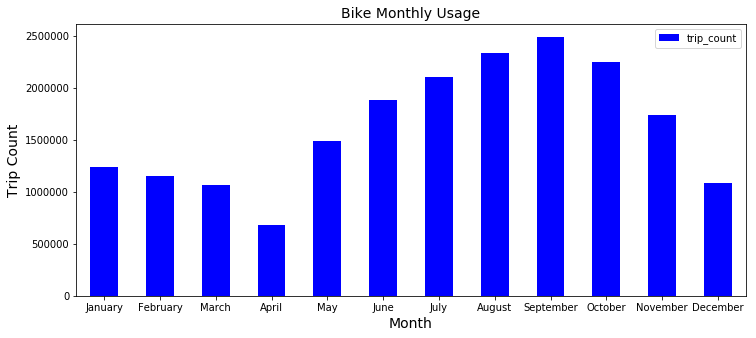

In [21]:
bike_monthly_usage()

## Bike Hourly Usage
The Usage increased dramatically from 6AM - 6PM and peak at 6PM. 
This is a clue that most people use bike for commuting to work.

In [19]:
def bike_hourly_usage():
    hour_day_bar = clean_df['start_hour'].value_counts().sort_index().plot.bar(color='orange')
    hour_day_bar.figure.set_size_inches(12, 5);
    plt.title('Bike Hourly Usage',fontsize=14)
    plt.xlabel('Hour',fontsize=14)
    plt.ylabel('Trip Count',fontsize=14)
    plt.xticks(rotation=0)
    plt.show()

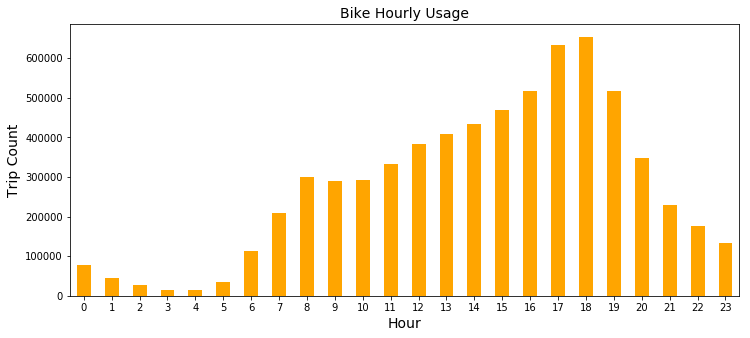

In [20]:
bike_hourly_usage()

## Bike Usage By Gender
Male rides are nearly 2 times more than female rides

In [22]:
def usage_by_gender():
    genders = ['Male', 'Female', 'Others']
    colors = sb.color_palette('pastel')[0:5]
    series = clean_df.gender.value_counts().reindex([1,2,0])
    plt.pie(series,labels=None, colors = colors ,autopct='%.0f%%')
    plt.title('Bike Usage By Gender')
    plt.legend( genders, loc='center right', bbox_to_anchor=(0.7, -0.1), fontsize = 10)
    plt.show()

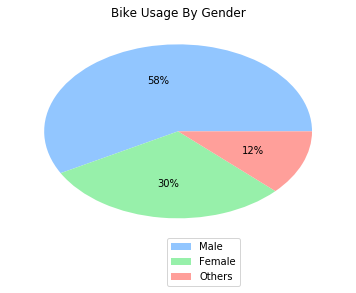

In [23]:
usage_by_gender()

## Bike Usage Time By User Type
#### Subcribes:
* Most rides at 5PM-6PM in working days(Mon-Friday). The peak is at Wednesday 6PM.

#### Customers:
* Most rides at 10AM-6PM in weekend. The peak is at Saturday 6PM.
* Not only weekend, Customers rides in working day too. In working days, most rides at 5PM-6PM. The peak is at Wednesday 6PM.



In [27]:
def usage_time_by_user_type():
    # Name of week days.
    week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    clean_df['week_day_sorted'] = pd.Categorical(clean_df['week_day'], ordered=True, categories=week_days)
    plt.figure(figsize=(25,8))
    plt.suptitle('Hourly vs Daily Usage For Subscribers vs Customers', fontsize = 24, y = 1)

    #Customers
    plt.subplot(1, 2, 1)
    df_customer = clean_df.query('usertype == "Customer"').groupby(["start_hour", "week_day_sorted"])["bikeid"].size().reset_index()
    df_customer = df_customer.pivot("start_hour", "week_day_sorted", "bikeid")
    sb.heatmap(df_customer, cmap = 'Oranges')
    plt.title("Customer", fontsize = 14)
    plt.xlabel('Week Days', fontsize = 14)
    plt.ylabel('Hourly', fontsize = 14)

    #Subscribers
    plt.subplot(1, 2, 2)
    df_subscriber = clean_df.query('usertype == "Subscriber"').groupby(["start_hour", "week_day_sorted"])["bikeid"].size().reset_index()
    df_subscriber = df_subscriber.pivot("start_hour", "week_day_sorted", "bikeid")
    sb.heatmap(df_subscriber, cmap="Oranges")
    plt.title("Subscriber", fontsize = 14)
    plt.xlabel('Week Days', fontsize = 14)
    plt.ylabel('');
    plt.show()

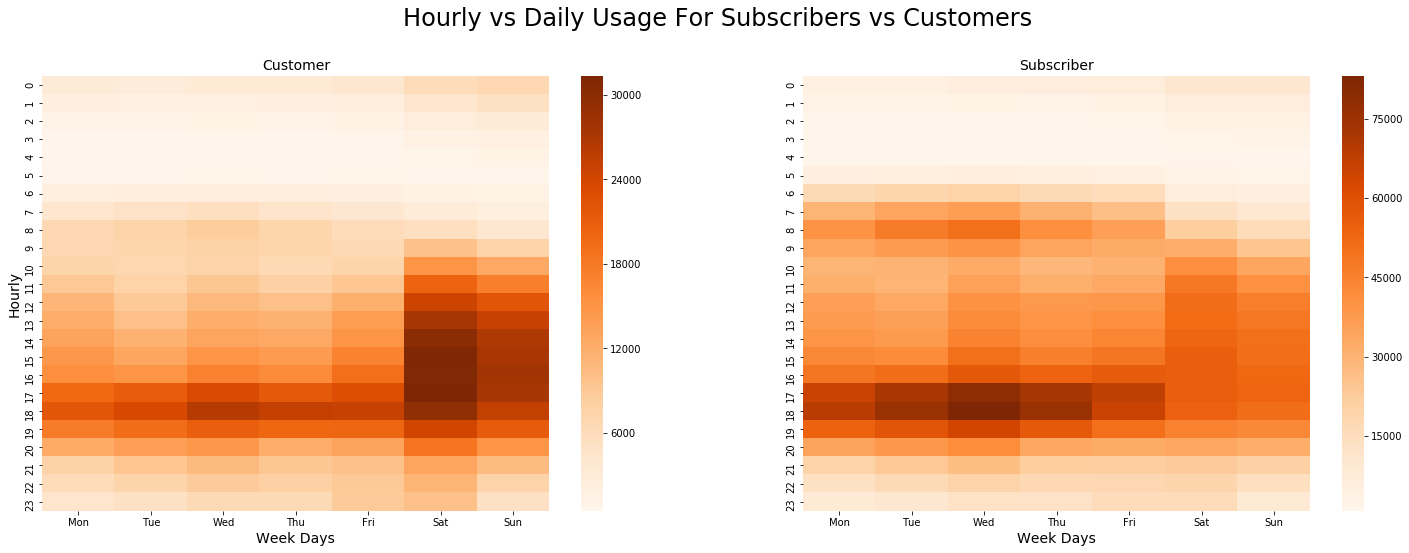

In [28]:
usage_time_by_user_type()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt




> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
